This notebook merges the data into a consistent xarray object. 

In [4]:
import xarray as xr
import rioxarray
import geopandas as gpd
from rasterio import features
import numpy as np
from pathlib import Path
import sys
import importlib
import utils.processing

scripts_dir = (Path("..") / "scripts").resolve()
if str(scripts_dir) not in sys.path:
    sys.path.insert(0, str(scripts_dir))




Starting with some key variables that will be used throughout the script. 

In [5]:
martinique_shape = True

## Elevation

In [ ]:
#elevation = rioxarray.open_rasterio("..\data\\raw\elevation\cop30_dem.tif")
#elevation

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_23736\2233468793.py:1: SyntaxWarning: invalid escape sequence '\d'
  elevation = rioxarray.open_rasterio("..\data\\raw\elevation\cop30_dem.tif")
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_23736\2233468793.py:1: SyntaxWarning: invalid escape sequence '\d'
  elevation = rioxarray.open_rasterio("..\data\\raw\elevation\cop30_dem.tif")


RasterioIOError: ..\data\raw\elevation\cop30_dem.tif: No such file or directory

In [ ]:
#reference = elevation.copy()
#reference

<xarray.DataArray (band: 1, y: 2160, x: 1800)> Size: 16MB
[3888000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 17kB 14.95 14.95 14.95 14.95 ... 14.35 14.35 14.35
  * x            (x) float64 14kB -61.25 -61.25 -61.25 ... -60.75 -60.75 -60.75
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

## Land cover

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_31248\344476078.py:1: SyntaxWarning: invalid escape sequence '\d'
  landcover_gross = rioxarray.open_rasterio("..\data\\raw\ESA_worldcover\ESA_WorldCover_10m_2020_v100_N12W063\ESA_WorldCover_10m_2020_v100_N12W063_Map.tif")


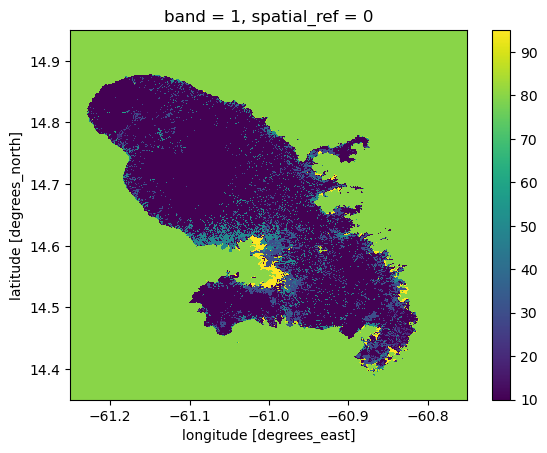

In [ ]:
landcover_gross = rioxarray.open_rasterio("..\data\\raw\ESA_worldcover\ESA_WorldCover_10m_2020_v100_N12W063\ESA_WorldCover_10m_2020_v100_N12W063_Map.tif")

landcover = landcover_gross.rio.reproject_match(reference)
# Reprojection + resampling pour correspondre à la grille du raster de référence
landcover.plot()

## INSEE data

In [ ]:
filosofi_vec = gpd.read_file("..\data\processed\Filosofi2017\Filosofi2017_carreaux_200m_mart.gpkg")
filosofi_vec.head(2)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_31248\2824284530.py:1: SyntaxWarning: invalid escape sequence '\d'
  filosofi_vec = gpd.read_file("..\data\processed\Filosofi2017\Filosofi2017_carreaux_200m_mart.gpkg")


,Idcar_200m,I_est_200,Idcar_1km,I_est_1km,Idcar_nat,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,...,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men,lcog_geo,geometry
0,CRS5490RES200mN1592600E728800,1,CRS5490RES1000mN1592000E728000,1,CRS5490RES4000mN1592000E728000,174380,1.0,0.2,0.1,0.2,...,0.1,0.3,0.2,0.1,0.0,0.0,0.1,0.4,97226,"POLYGON ((728800 1592600, 728800 1592800, 7290..."
1,CRS5490RES200mN1594200E728800,1,CRS5490RES1000mN1594000E728000,1,CRS5490RES4000mN1592000E728000,174380,6.0,1.4,0.4,1.2,...,0.6,1.8,1.0,0.8,0.0,0.0,0.4,2.6,97226,"POLYGON ((728800 1594200, 728800 1594400, 7290..."


In [ ]:
filosofi = class_vector_to_raster(filosofi_vec, "filosofi_men_prop", "Men_prop", reference)

In [ ]:
filosofi.max()

<xarray.DataArray 'filosofi_men_prop' ()> Size: 8B
array(0.)

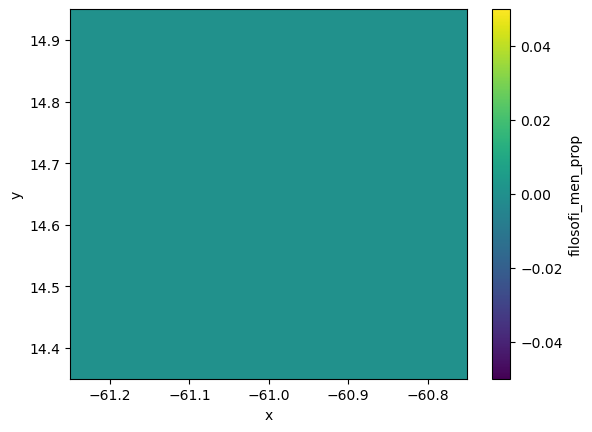

In [ ]:
filosofi.plot()

## OSM data

In [ ]:
buildings_vec = gpd.read_file("..\\data\\raw\OSM\\buildings.shp")
buildings_vec.head()

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_31248\2230429923.py:1: SyntaxWarning: invalid escape sequence '\O'
  buildings_vec = gpd.read_file("..\\data\\raw\OSM\\buildings.shp")


,element,id,addr_city,addr_postc,addr_stree,addr_house,source_geo,addr_place,addr_count,addr_hou_1,addr_full,geometry
0,relation,373384,Rivière-Salée,97215,None,BP 38,None,None,None,Quartier Thoraille,None,"POLYGON ((-60.96627 14.51354, -60.96624 14.513..."
1,relation,444734,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03895 14.63476, -61.03893 14.634..."
2,relation,444735,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03717 14.63488, -61.03718 14.634..."
3,relation,444754,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03955 14.63439, -61.03954 14.634..."
4,relation,543455,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.07905 14.64925, -61.07903 14.649..."


In [ ]:
buildings = binary_vector_to_raster(buildings_vec, "buildings_test", reference)
buildings

<xarray.DataArray 'buildings_test' (y: 2160, x: 1800)> Size: 31MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2160, 1800))
Coordinates:
  * y        (y) float64 17kB 14.95 14.95 14.95 14.95 ... 14.35 14.35 14.35
  * x        (x) float64 14kB -61.25 -61.25 -61.25 ... -60.75 -60.75 -60.75

In [ ]:
buildings

<xarray.DataArray 'buildings_test' (y: 2160, x: 1800)> Size: 31MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2160, 1800))
Coordinates:
  * y        (y) float64 17kB 14.95 14.95 14.95 14.95 ... 14.35 14.35 14.35
  * x        (x) float64 14kB -61.25 -61.25 -61.25 ... -60.75 -60.75 -60.75

## Road Network

This function computes the distance to a road from anypoint in space. 

In [ ]:
roads = gpd.read_file("..\data\\raw\OSM\highway_lines.shp")
roads['highway'].value_counts()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_31248\580354757.py:1: SyntaxWarning: invalid escape sequence '\d'
  roads = gpd.read_file("..\data\\raw\OSM\highway_lines.shp")


highway
service           12295
residential       12122
track              5629
footway            4879
unclassified       1759
secondary          1406
path               1282
primary            1065
tertiary            950
trunk               274
steps               186
trunk_link          142
primary_link        141
motorway_link       122
motorway             94
busway               87
secondary_link       50
living_street        43
pedestrian           27
platform             22
tertiary_link        17
bridleway            12
corridor             10
cycleway              9
construction          4
raceway               2
Name: count, dtype: int64

<Axes: >

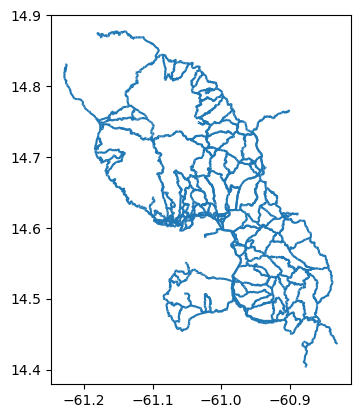

In [ ]:
road_type_list = ['motorway', 'primary', 'secondary','tertiary', 'trunk']
# use Series.isin (not .str.isin)
roads = roads[roads['highway'].isin(road_type_list)]
roads.plot()

In [ ]:
roads_distance = road_distance(roads, "distance", reference)

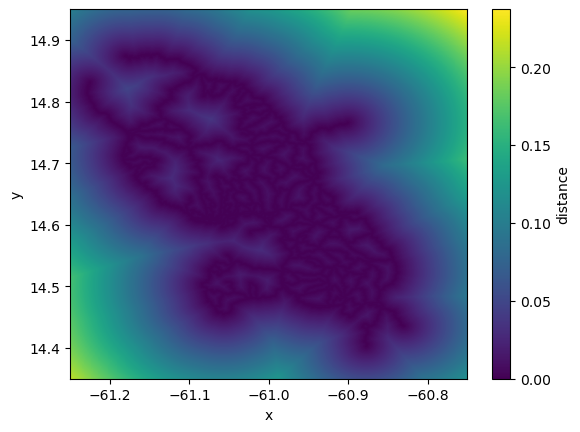

In [ ]:
roads_distance.plot()

## Combining the dataarray in a dataset

In [ ]:
ds = xr.Dataset({
    "elevation": elevation.squeeze(drop=True),
    "buildings": buildings, 
    "landcover": landcover, 
    "road_distance" : roads_distance
})

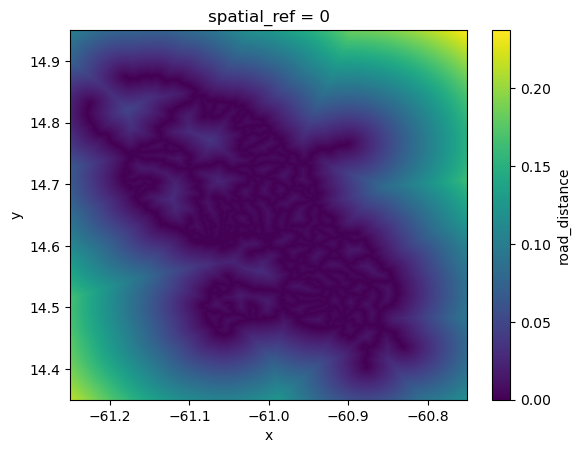

In [ ]:
ds.road_distance.plot()

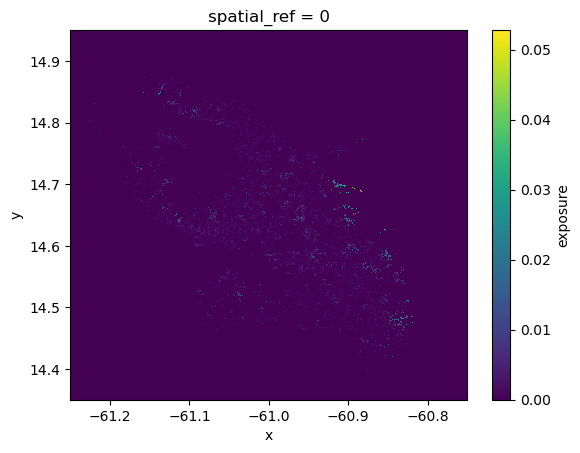

In [ ]:
ds['exposure'] = ds.road_distance * ds.buildings
ds.exposure.plot()

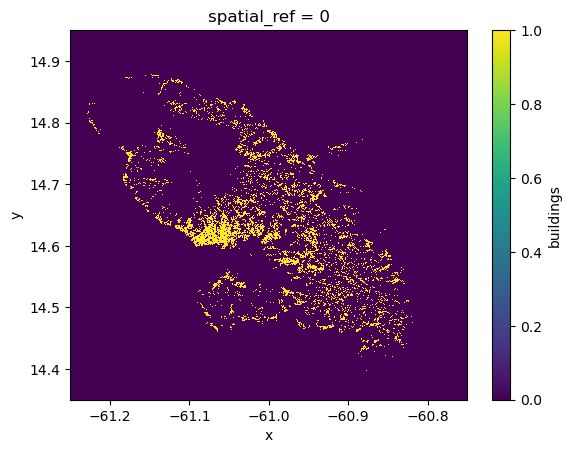

In [ ]:
ds.buildings.plot()

In [ ]:
ds.to_netcdf("../data/processed/dataset.nc")